In [1]:
import geopandas as gpd
import rasterio
from rasterio import features
import numpy as np
from shapely.geometry import mapping
import matplotlib.pyplot as plt
import os


In [2]:
roads_fp = r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\roads\pune_roads.shp"
roads = gpd.read_file(roads_fp)
roads.head()


u            v  key                    osmid      highway  oneway  \
0  245645011  10248250797    0                670151659  residential   False   
1  245645011  10248250791    0                670151659  residential   False   
2  245645101   2365711249    0                256448779        trunk    True   
3  245645101   2621107676    0                888608969        trunk   False   
4  245645101   8006247832    0  [858863081, 1022821427]        trunk    True   

  reversed      length lanes                 name maxspeed   ref bridge  \
0     True   10.313285  None                 None     None  None   None   
1    False   34.254289  None                 None     None  None   None   
2    False   13.664546     2  Katraj Kondhwa Road     None  None   None   
3     True   51.983832     2  Katraj Kondhwa Road     None  None   None   
4    False  115.520877  None          Satara Road       50  NH60   None   

  est_width access junction tunnel width  \
0      None   None     None   None  None   
1      None   None     None   None  None   
2      None   None     None   None  None   
3      None   None     None   None  None   
4      None   None     None   None  None   

                                            geometry  
0  LINESTRING (73.89504 18.44157, 73.89506 18.44147)  
1  LINESTRING (73.89504 18.44157, 73.89506 18.441...  
2   LINESTRING (73.85892 18.4472, 73.85879 18.44718)  
3  LINESTRING (73.85892 18.4472, 73.85902 18.4472...  
4  LINESTRING (73.85892 18.4472, 73.859 18.44686,...

In [5]:
ref_raster = r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\population\ind_pd_2000_1km_UNadj.tif"
with rasterio.open(ref_raster) as src:
    meta = src.meta.copy()
    out_shape = (src.height, src.width)
    transform = src.transform


In [6]:
shapes = ((geom, 1) for geom in roads.geometry)
roads_raster = features.rasterize(
    shapes=shapes,
    out_shape=out_shape,
    transform=transform,
    fill=0,
    dtype="uint8"
)

# Save rasterized roads
roads_mask_fp = r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\population\ind_pd_2000_1km_UNadj.tif"
with rasterio.open(roads_mask_fp, 'w', **meta) as dst:
    dst.write(roads_raster, 1)

print("Saved rasterized roads:", roads_mask_fp)

Saved rasterized roads: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\population\ind_pd_2000_1km_UNadj.tif


In [7]:
from scipy.ndimage import distance_transform_edt

# Roads are 1 → invert mask so background=1, roads=0
inverted = 1 - roads_raster
dist_raster = distance_transform_edt(inverted) * transform.a  # pixel size

# Save distance raster
roads_dist_fp = r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\population\ind_pd_2000_1km_UNadj.tif"
with rasterio.open(roads_dist_fp, 'w', **meta) as dst:
    dst.write(dist_raster.astype('float32'), 1)

print("Saved distance-to-roads raster:", roads_dist_fp)


Saved distance-to-roads raster: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\population\ind_pd_2000_1km_UNadj.tif


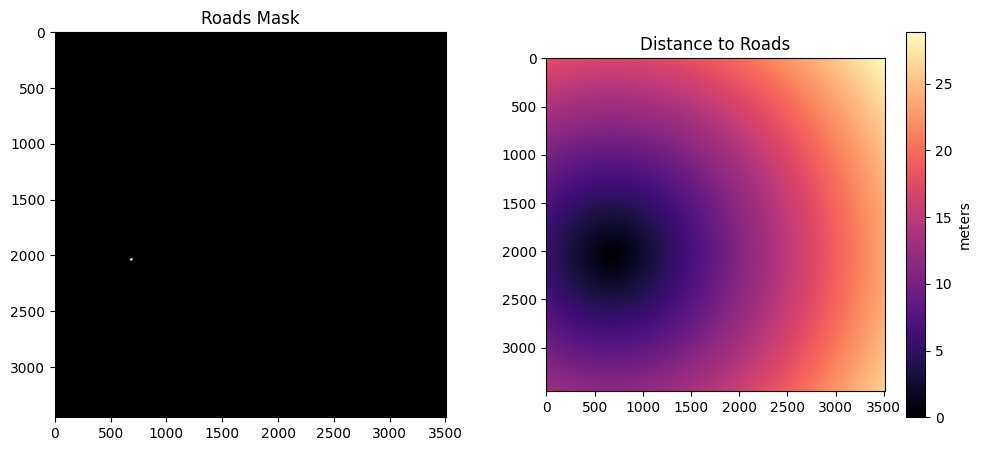

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Roads Mask")
plt.imshow(roads_raster, cmap="gray")

plt.subplot(1,2,2)
plt.title("Distance to Roads")
plt.imshow(dist_raster, cmap="magma")
plt.colorbar(label="meters")
plt.show()


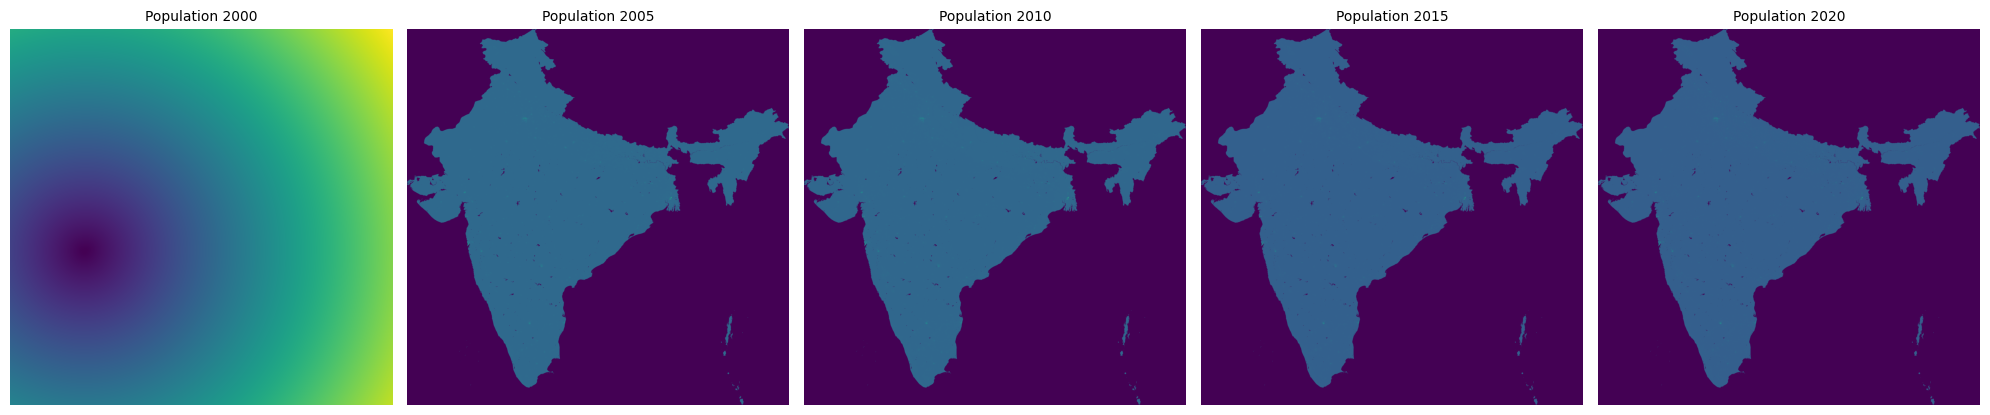

In [9]:
import rasterio
import matplotlib.pyplot as plt

# File paths
files = [
    r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\population\ind_pd_2000_1km_UNadj.tif",
    r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\population\ind_pd_2005_1km_UNadj.tif",
    r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\population\ind_pd_2010_1km_UNadj.tif",
    r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\population\ind_pd_2015_1km_UNadj.tif",
    r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\population\ind_pd_2020_1km_UNadj.tif"
]

titles = ["Population 2000", "Population 2005", "Population 2010", "Population 2015", "Population 2020"]

# Load rasters
rasters = []
for f in files:
    with rasterio.open(f) as src:
        rasters.append(src.read(1))

# Plot them in a row (5 subplots)
plt.figure(figsize=(20, 5))

for i, (data, title) in enumerate(zip(rasters, titles)):
    plt.subplot(1, 5, i+1)
    plt.imshow(data, cmap="viridis")
    plt.title(title, fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [2]:
import rasterio
import numpy as np
import os

# File paths
pop_files = [
    r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\population\ind_pd_2000_1km_UNadj.tif",
    r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\population\ind_pd_2005_1km_UNadj.tif",
    r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\population\ind_pd_2010_1km_UNadj.tif",
    r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\population\ind_pd_2015_1km_UNadj.tif",
    r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\population\ind_pd_2020_1km_UNadj.tif"
]

population_layers = []
for f in pop_files:
    with rasterio.open(f) as src:
        population_layers.append(src.read(1))

population_stack = np.stack(population_layers, axis=-1)
print("Population stack shape:", population_stack.shape)  # (height, width, 5)


Population stack shape: (3451, 3508, 5)


In [3]:
dist_road_path = r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\processed\resampled_pop_2000.tif"
with rasterio.open(dist_road_path) as src:
    dist_to_road = src.read(1)

print("Distance-to-road shape:", dist_to_road.shape)


Distance-to-road shape: (7781, 7641)


In [4]:
# Example Landsat bands (update filenames if different in your images folder)
red_band = r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\images\LC09_L2SP_147047_20250902_20250904_02_T2_SR_B4.TIF"
nir_band = r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\images\LC09_L2SP_147047_20250902_20250904_02_T2_SR_B5.TIF"

with rasterio.open(red_band) as red_src, rasterio.open(nir_band) as nir_src:
    red = red_src.read(1).astype("float32")
    nir = nir_src.read(1).astype("float32")

ndvi = (nir - red) / (nir + red + 1e-6)  # avoid division by zero
print("NDVI shape:", ndvi.shape)


NDVI shape: (7781, 7641)


In [5]:
# Align shapes if needed
min_shape = (
    min(population_stack.shape[0], dist_to_road.shape[0], ndvi.shape[0]),
    min(population_stack.shape[1], dist_to_road.shape[1], ndvi.shape[1])
)

# Crop arrays to same shape
population_stack = population_stack[:min_shape[0], :min_shape[1], :]
dist_to_road = dist_to_road[:min_shape[0], :min_shape[1]]
ndvi = ndvi[:min_shape[0], :min_shape[1]]

# Final feature stack
features_stack = np.dstack([population_stack, dist_to_road, ndvi])
print("Final features stack shape:", features_stack.shape)  
# Example: (height, width, 7) → 5 pop layers + 1 road + 1 NDVI


Final features stack shape: (3451, 3508, 7)


In [6]:
out_path = r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\processed\features_stack.npz"
os.makedirs(os.path.dirname(out_path), exist_ok=True)

np.savez_compressed(out_path, features=features_stack)
print("✅ Saved feature stack at:", out_path)


✅ Saved feature stack at: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\processed\features_stack.npz
